In [1]:
import os
print(os.listdir("../input/flowers/flowers"))
data = '../input/flowers/flowers'

['daisy', 'sunflower', 'tulip', 'rose', 'dandelion']


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications import VGG16

# Image Size on data
IMG_SIZE= ( 320, 240 )

# Number of Labels
NUM_LABELs = 5

# Data directory paths
DATA = '../input/flowers/flowers'

# Temp Batch sizes
TRAIN_BATCH_SIZE = 91  # steps per epoch = 38
TEST_BATCH_SIZE = 173  # steps for validation 5

Using TensorFlow backend.


In [3]:
    ####### VGG16 
    import keras
    from keras.models import Sequential
    from keras.layers import Activation
    from keras.layers.core import Dense, Flatten
    from keras.layers.normalization import BatchNormalization
    from keras.layers.convolutional import *
    from keras.preprocessing.image import ImageDataGenerator
    from keras.optimizers import Adam
    from keras.metrics import categorical_crossentropy
    from keras.applications import VGG16
    from keras.applications import VGG19



    
    # Get a batch of training data of size 
    data_gen = ImageDataGenerator( rescale= 1./255,
                                   rotation_range=180,
                                   horizontal_flip=True,
                                   zoom_range=.4,
                                   width_shift_range=40,
                                   height_shift_range=40,
                                   validation_split=.2
                                 )
    train_batch = data_gen.flow_from_directory( DATA, 
                                                target_size=IMG_SIZE,
                                                batch_size=TRAIN_BATCH_SIZE,
                                                subset="training",
                                                class_mode="categorical",
                                                interpolation="nearest"
                                               )
    test_batch = data_gen.flow_from_directory( DATA,
                                               target_size=IMG_SIZE,
                                               batch_size=TEST_BATCH_SIZE,
                                               subset="validation",
                                               class_mode="categorical",
                                               interpolation="nearest"
                                             )
    # Image data ( height of 320, length of 240, image channel 3 for RGB )
    shape = ( 320, 240, 3 )
    vgg16_model = keras.applications.vgg16.VGG16( include_top=False,
                                                  weights='imagenet',
                                                  input_shape=shape )
    base_VGG16_model = Sequential()
    for layer in vgg16_model.layers:
        base_VGG16_model.add( layer )


Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.
58892288/58889256 [==============================] - 2s 0us/step


In [4]:
    from keras.layers import Dropout
    base_VGG16_model.add( Flatten() )

In [5]:
    output_base_VGG16_model = base_VGG16_model.add( Dense(5, activation='softmax') )
    
    base_VGG16_model.compile( Adam( lr=.0001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
    base_VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 320, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 60, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 80, 60, 256)       295168    
__________

In [6]:
    # Test the base VGG16
    history = base_VGG16_model.fit_generator( 
        train_batch,
        steps_per_epoch=38,
        epochs=20, 
        validation_data=test_batch,
        validation_steps=5,
        verbose=1)

Epoch 1/20
38/38 [==============================] - 105s 3s/step - loss: 1.0978 - acc: 0.5616 - val_loss: 0.8867 - val_acc: 0.6469
Epoch 2/20
38/38 [==============================] - 73s 2s/step - loss: 0.6630 - acc: 0.7363 - val_loss: 0.5793 - val_acc: 0.7851
Epoch 3/20
38/38 [==============================] - 78s 2s/step - loss: 0.6325 - acc: 0.7601 - val_loss: 0.5404 - val_acc: 0.7898
Epoch 4/20
38/38 [==============================] - 76s 2s/step - loss: 0.5349 - acc: 0.7930 - val_loss: 0.4852 - val_acc: 0.8130
Epoch 5/20
38/38 [==============================] - 78s 2s/step - loss: 0.5415 - acc: 0.7954 - val_loss: 0.4692 - val_acc: 0.8304
Epoch 6/20
38/38 [==============================] - 77s 2s/step - loss: 0.4003 - acc: 0.8527 - val_loss: 0.4315 - val_acc: 0.8316
Epoch 7/20
38/38 [==============================] - 77s 2s/step - loss: 0.3800 - acc: 0.8536 - val_loss: 0.3650 - val_acc: 0.8606
Epoch 8/20
38/38 [==============================] - 77s 2s/step - loss: 0.3814 - acc: 0.8

Text(0.5,1,'Training and validation loss for VGG16.')

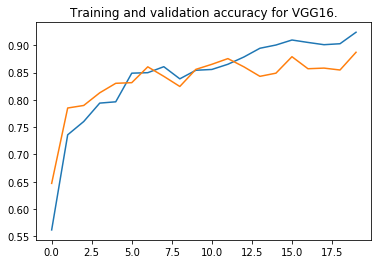

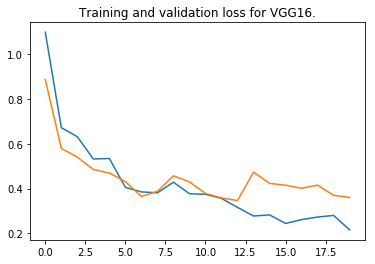

In [7]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy for VGG16.')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss for VGG16.')